In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Univariate plots

### in progress

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel("Superstore_USA.xlsx")

In [4]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [5]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

### KDE OF NUMERIC DATAS

#### kde works with probability density function
here most of the columns uses continous pdf

### Some Common Info About Plot

the higher the gradient the more distributions(values) must be around it
,higher gradient= higher density,
if flat (i.e flat like discrete) it means that there is no underlying distribution around that area 

In [6]:
sns.set_style("whitegrid")
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [7]:
#plt.style.use("light_background")

In [8]:
def kde_plot(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    sns.kdeplot(df[x],shade=True,palette=("magma"),color='grey')
    plt.title(x+' KDE ')
    plt.show()

plt.figure(figsize=(30,40))   

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

In [9]:
# kde_plot("Product Base Margin",1)
# kde_plot("Unit Price",2)

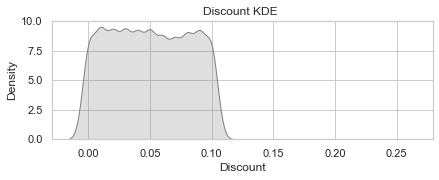

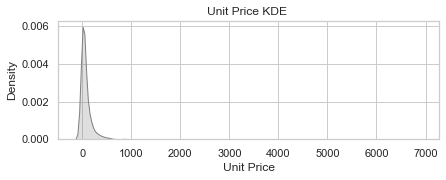

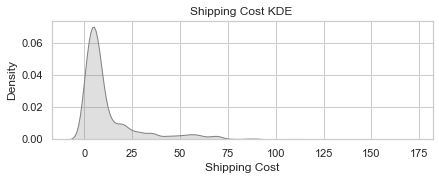

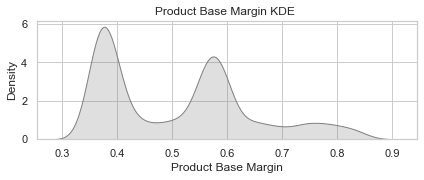

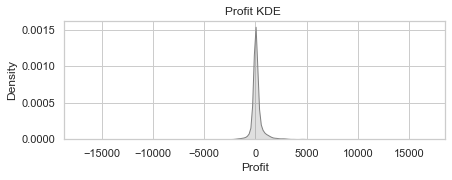

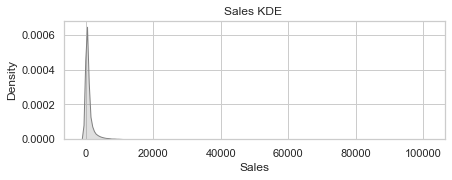

In [10]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        kde_plot(i,n)
        n+=1

#### for both kde and histogram+kde

In [11]:
# def kde_plot(x,fig):
#     plt.figure(figsize=(15,10))
    
#     plt.subplot(4,2,fig)
#     sns.kdeplot(df[x],shade=True,palette=("magma"),color='grey')
#     plt.title(x+' KDE ')
#     plt.subplot(4,2,(fig+1))
#     plt.title(x+'histogram and kde')
#     sns.histplot(df[x],kde=True,palette=("magma"))
#    # plt.axhline(round(df[x].value_counts().mean()),color = "red",label="Mean")
    
#     plt.legend()
#     plt.show()

# plt.figure(figsize=(30,40))   

## HISTOGRAMS OF NUMERIC DATA

In [12]:
def hist_plot(x,fig):
    plt.figure(figsize=(15,20))
    
    
    plt.subplot(4,2,fig)
    sns.histplot(df[x],kde=True,palette=("magma"),color='grey')
    plt.axvline(df[x].mean(), color = "green",label="Mean")
    plt.axvline(df[x].median(), color = "red",label="Mean")
    plt.axvline(df[x].mode().mean(), color = "black",label="Mode")

    plt.title(x+' histogram and kde')
   # plt.axhline(round(df[x].value_counts().mean()),color = "red",label="Mean")
    
    plt.show()

plt.figure(figsize=(30,40))   

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

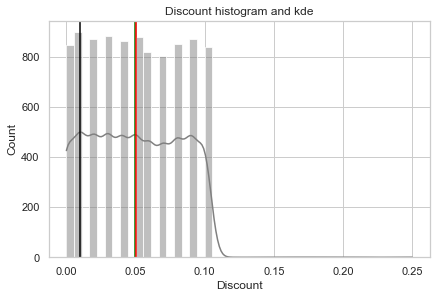

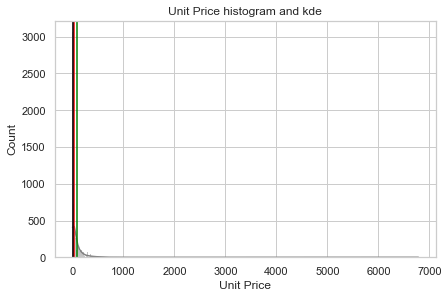

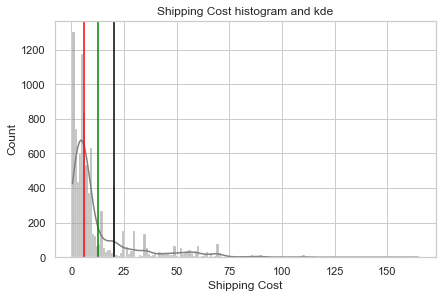

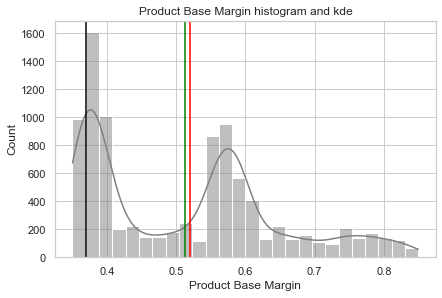

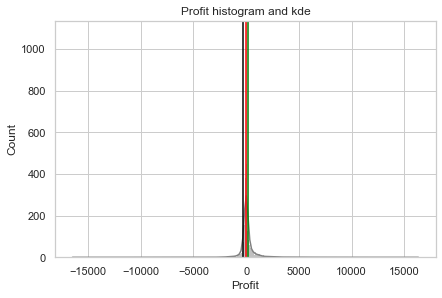

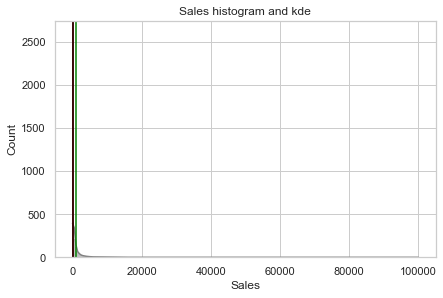

In [13]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        hist_plot(i,n)
        n+=1

here we can understand that how much data is spread and the line of mean and median help us to determine that how much data is over and under over mean,median and mode
these summarizes whole column and represents the data's center point or typical value.

## ECDF_PLOT 

##### Advantages:


1)No binning or smothing
 2)compare different dist of category


##### Disadvantages :

1)No central tendencies 2)bimodel dist is harder to detect

In [26]:
def ecdf_plot(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    sns.ecdfplot(df[x],palette=("magma"),color='grey')
    plt.title(x+' ecdf')
    plt.show()

plt.figure(figsize=(30,40))  

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

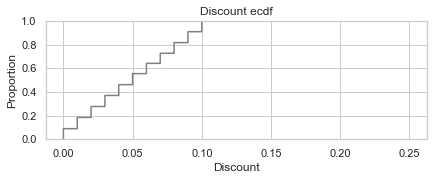

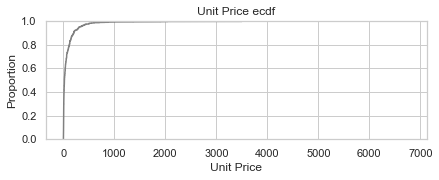

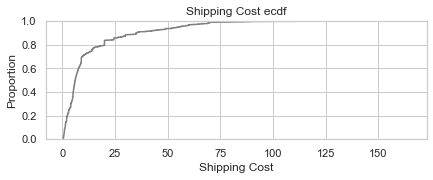

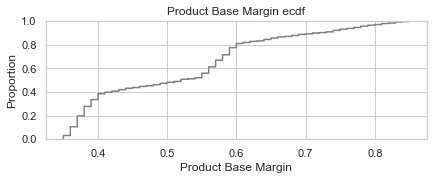

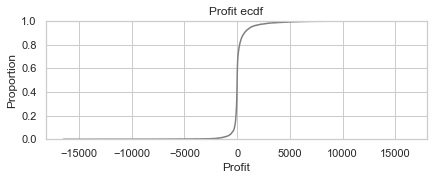

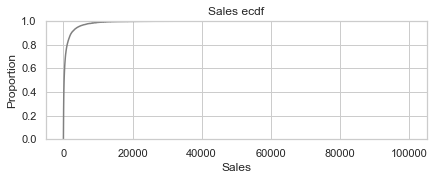

In [28]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        ecdf_plot(i,n)
        n+=1

### Box-whisker plot

it works with median,the central black lines indicates the median the box limits are Q1(25th) and Q2(75th) Inter-Quartile-Ranges  

Whisker tells us the spread of data and the point outside whiskers are the outliers

we can control whisker length cause they can exceed sometimes (1.5xIQR) (including outliers)

In [41]:
def box_plot(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    sns.boxplot(df[x],palette=("magma"),fliersize=2)
    #sns.boxplot(df[x],palette=("magma"),whis=10)
    plt.title(x+' box plot')
    plt.show()

plt.figure(figsize=(30,40))  

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

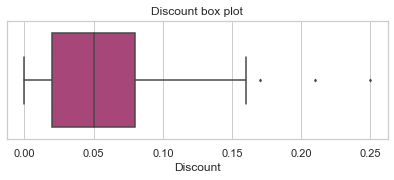

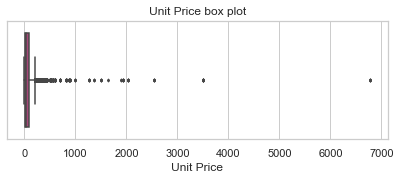

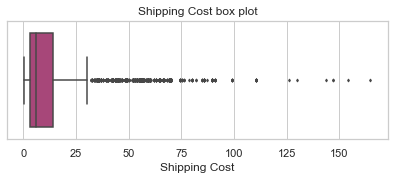

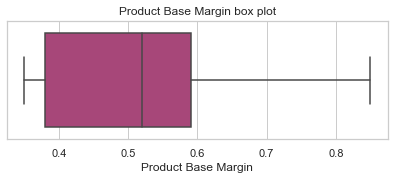

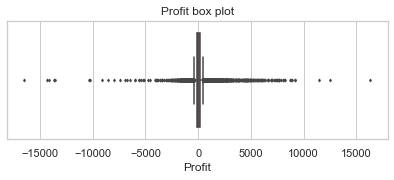

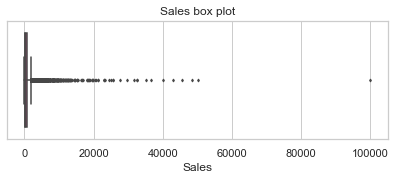

In [42]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        box_plot(i,n)
        n+=1

it shows that last two columns has too much outliers and the data is too much spread

## violin plot

one part box plot , two parts KDE


it is symmetric ,the thick blact part is IQR and the thin black line is whiskers

box alerts the outliers while violine use kde for determining pdf

https://chartio.com/learn/charts/violin-plot-complete-guide/(you can learn more at)

In [73]:
def violin_plot(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    sns.violinplot(df[x],palette=("magma"))
    plt.title(x+' violin plot')
    plt.show()

plt.figure(figsize=(30,40))  

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

In [74]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

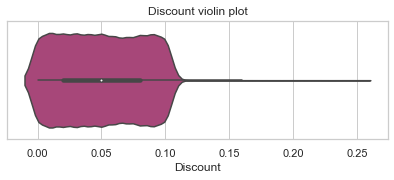

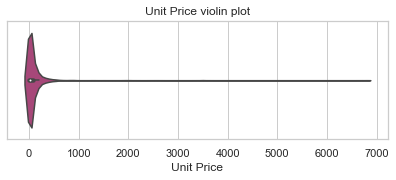

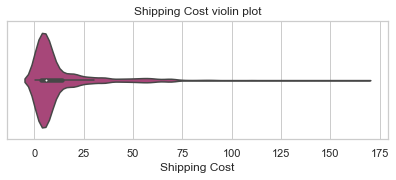

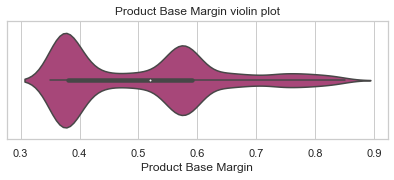

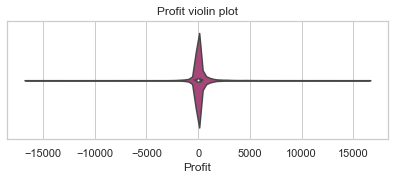

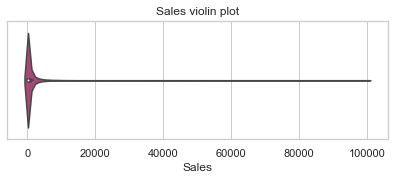

In [75]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        violin_plot(i,n)
        n+=1

## strip plot

UNIVARIATE

FOR short sample, usefull for outliers in data

can be categorical

In [88]:
def strip_plot(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    sns.stripplot(df[x],palette=("magma"),size=3)
    plt.title(x+' strip plot')
    plt.show()

plt.figure(figsize=(30,40))  

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

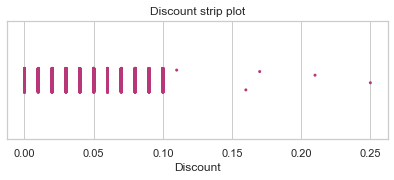

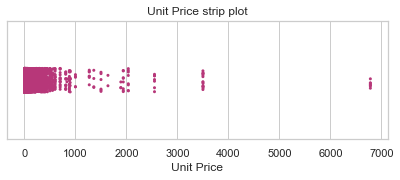

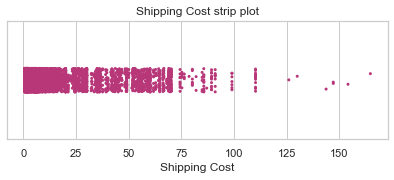

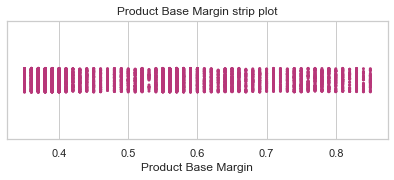

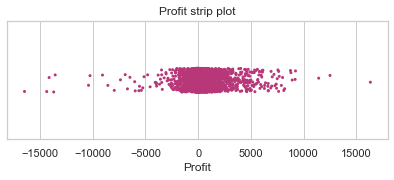

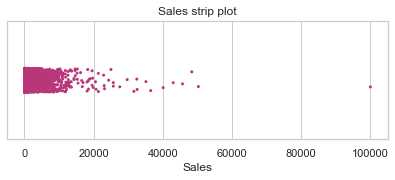

In [89]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        strip_plot(i,n)
        n+=1

In [ ]:
#CHANGES TO MAKE ,
#MAKE QUARTILE RANGE AXHV LINES
#CREATE HUE AND BINNING IN MOST  OF THE PLOTS